<a href="https://colab.research.google.com/github/Luisgcattelan/MecEstComp/blob/main/Tarefa6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline


In [ ]:
def Energy(config,L):
    total_energy = 0
    for i in range(len(config)):
        for j in range(len(config)):
            S = config[i,j]
            nb = config[(i+1)%L, j] + config[i, (j+1)%L] + config[(i-1)%L, j] + config[i, (j-1)%L]
            total_energy += -nb * S
    return (total_energy/2)



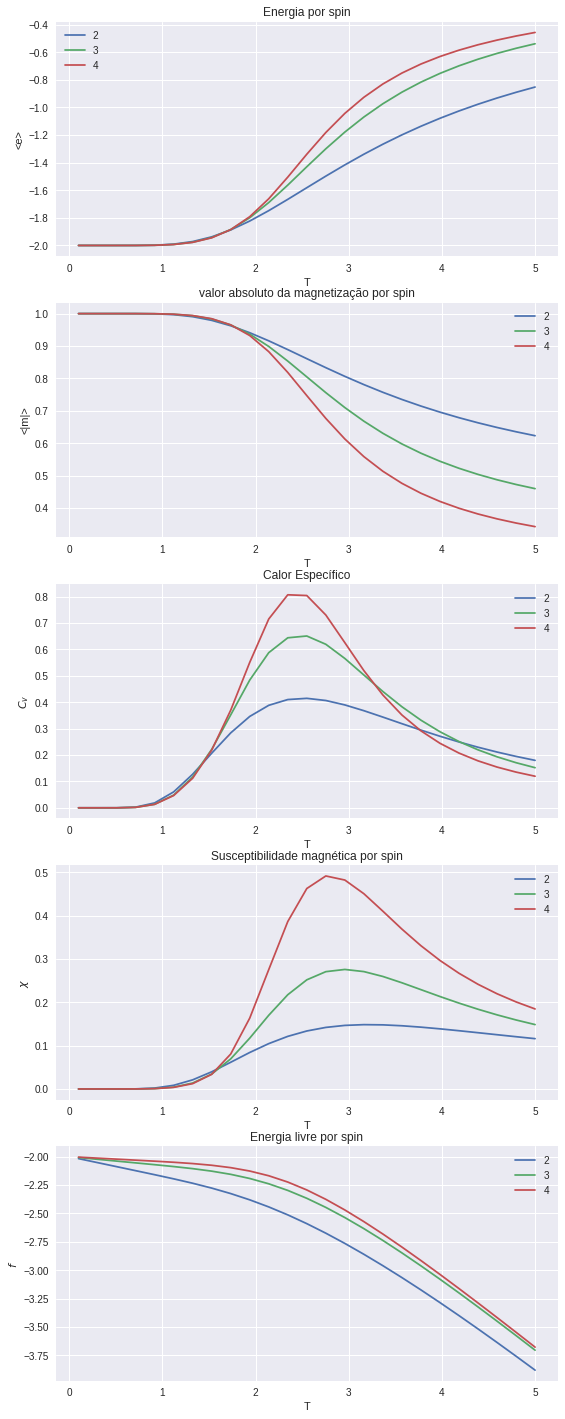

In [ ]:
Temp = np.linspace(0.1,5, 25)
Lspace = [2,3,4]
fig, ax = plt.subplots(5,1, figsize=(9,25))
for i,L in enumerate(Lspace):
  L2 = L*L
  mag_mean = []
  e_mean = []
  f_mean = []
  cv_mean = []
  xx_mean = []

  for k in range(len(Temp)):
    T = Temp[k]     
    E = 0
    peso = 0    
    Z    = 0   
    mag  = 0  
    mag2 = 0    
    e2   = 0   
    e    = 0
    #reshape 
    for state in itertools.product([1,-1],repeat=L2):
      s = np.array(state).reshape((L,L))

      E = Energy(s, L)
      peso = np.exp(-E/T)                            
      Z = Z + peso                          
      e = e + (E/L2)*peso
      e2 = e2 +(E/L2)**2*peso
      #print(peso)

      mag = mag + abs(np.sum(s))/L2*peso
      mag2 = mag2 + ((np.sum(s))/L2)**2*peso



    xx_mean.append((L2/T)*(mag2/Z - (mag/Z)**2))
    cv_mean.append(L2/(T**2)*(e2/Z - (e/Z)**2))
    mag_mean.append(mag/Z)
    e_mean.append(e/Z)
    f_mean.append(-T/L2*np.log(Z))

  ax[0].plot(Temp, e_mean, label=L)
  ax[0].set(xlabel='T', ylabel='<e>', title='Energia por spin' )
  ax[0].legend()

  ax[1].plot(Temp, mag_mean, label=L)
  ax[1].set(xlabel='T', ylabel='<|m|>', title='valor absoluto da magnetização por spin' )
  ax[1].legend()

  ax[2].plot(Temp, cv_mean, label=L)
  ax[2].set(xlabel='T', ylabel='$C_v$', title='Calor Específico' )
  ax[2].legend()

  ax[3].plot(Temp, xx_mean, label=L)
  ax[3].set(xlabel='T', ylabel='$\chi$', title='Susceptibilidade magnética por spin' )
  ax[3].legend()

  ax[4].plot(Temp, f_mean, label=L)
  ax[4].set(xlabel='T', ylabel='$f$', title='Energia livre por spin' )
  ax[4].legend()

plt.savefig("Tarefa6.pdf")